# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
*Image from http://www.learner.org/courses/againstallodds/about/glossary.html. Note this image uses $\alpha$ and $\beta$ instead of $\beta_0$ and $\beta_1$.*

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
boston.data.shape

(506, 13)

In [5]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
# Print description of Boston housing data set
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Now let's explore the data set itself. 

In [7]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [8]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [9]:
print(boston.target.shape)

(506,)


In [10]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [11]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

Text(0.5, 1.0, 'Relationship between CRIM and Price')

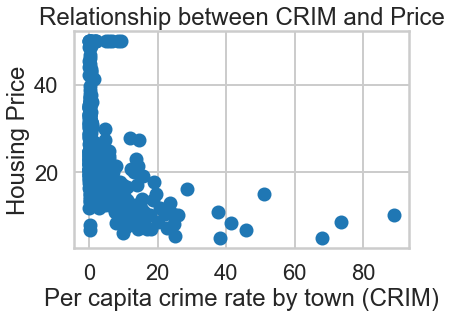

In [12]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

**Exercise: What kind of relationship do you see? e.g. positive, negative? linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?**

**Solution:**
 
*Although the prices tend to decrease with an increase in Per Capita Crime Rate by town(CRIM) overall, we also see houses with lower values having the same crime rate as the most expensive ones. It doesn’t look to be exactly linear.*

**Exercise: Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.**

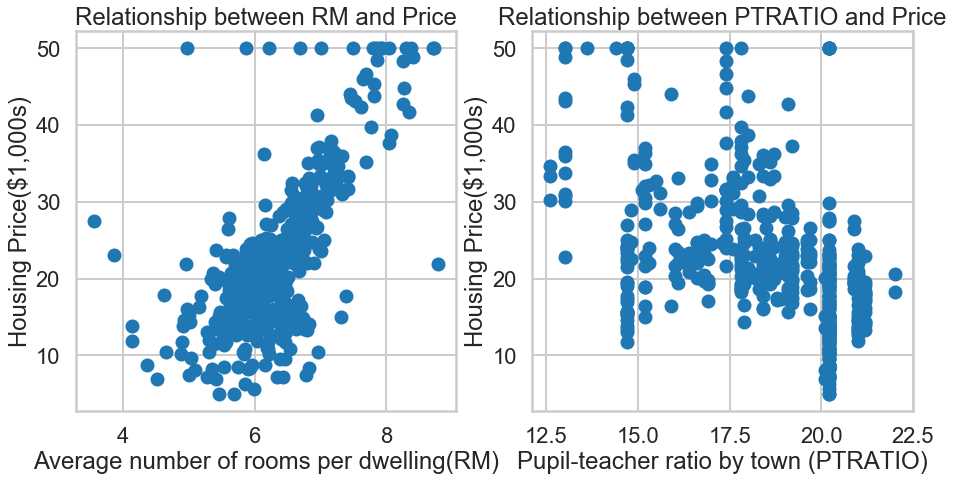

In [13]:
#  scatter plot between *RM* and *PRICE*
'''Setting sharex or sharey to True enables global sharing across the whole grid'''
fig, (ax1, ax2) = plt.subplots(2,sharex=True, sharey=True,figsize=(15,7))


plt.subplot(121)
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Average number of rooms per dwelling(RM)")
plt.ylabel("Housing Price($1,000s)")
plt.title("Relationship between RM and Price");

plt.subplot(122)
#  scatter plot between *PTRATIO* and *PRICE*
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("Pupil-teacher ratio by town (PTRATIO)")
plt.ylabel("Housing Price($1,000s)")
plt.title("Relationship between PTRATIO and Price");



*There seems to be a strong, positive linear relationship between the average number of rooms per dwelling(RM) and the housing price. As the number of rooms increases, the housing price also increases eventhough there seems to be quite a few outliers.*

*There seems to be a very weak negative linear relationship with quite a bit of outliers between PTRATIO and the housing prince. As housing price goes up, the size of classes (pupil-teacher ratio) goes down. In other words,lower the student teacher ratio, higher the quality of education and therefore, better neighborhood which ultimately leads to higher price.*

**Exercise: What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.**

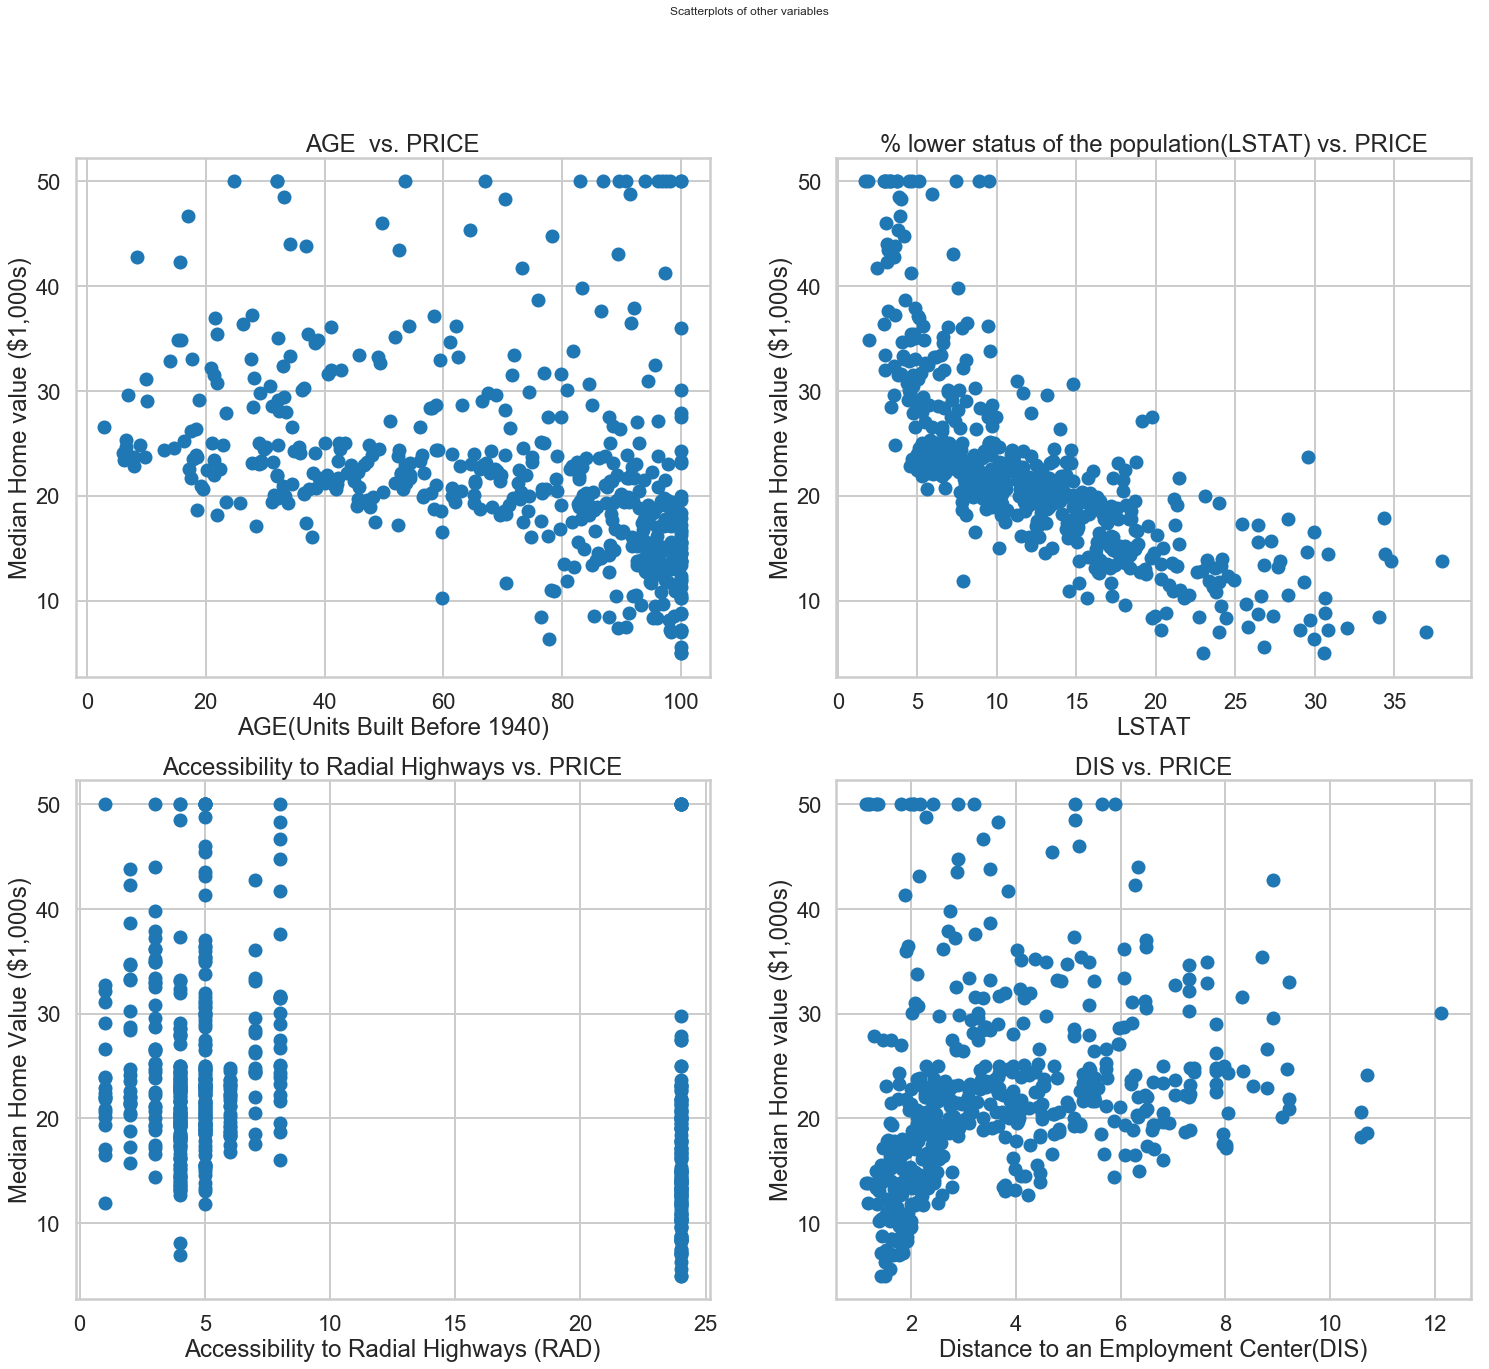

In [14]:
fig, (ax1, ax2,ax3,ax4) = plt.subplots(4,sharex=True, sharey=True,figsize=(25,21))
fig.suptitle('Scatterplots of other variables ')
plt.subplot(221)
plt.scatter(bos.AGE, bos.PRICE)
plt.xlabel('AGE(Units Built Before 1940)')
plt.ylabel('Median Home value ($1,000s)')
plt.title('AGE  vs. PRICE');


plt.subplot(222)
plt.scatter(bos.LSTAT, bos.PRICE)
plt.xlabel("LSTAT")
plt.ylabel('Median Home value ($1,000s)')
plt.title('% lower status of the population(LSTAT) vs. PRICE');


plt.subplot(223)
plt.scatter(bos.RAD, bos.PRICE)
plt.xlabel('Accessibility to Radial Highways (RAD)')
plt.ylabel('Median Home Value ($1,000s)')
plt.title('Accessibility to Radial Highways vs. PRICE');

plt.subplot(224)
plt.scatter(bos.DIS, bos.PRICE)
plt.xlabel("Distance to an Employment Center(DIS)")
plt.ylabel('Median Home value ($1,000s)')
plt.title('DIS vs. PRICE');


*There is a slight negative correlation between the median home values and the age of a town, where towns with larger percentages of older units have slightly lower median values.*

*LSTAT has a clear negative linear relationship with the median value of homes suggesting that as the percentage of lower status of the population goes up, the housing price decreases which indicates that affluent families tend to live where there is lower percentage of LSTAT*

*With regards to distance to employment centers, only the first quartile of median housing values with less than 20,000 dollars stands out as being much closer than the other quartiles. Highest index of accessibility to radial highways should have had negative correlation to MEDV  if I had to guess but obviously being closer to your work seems not worth the value based on he scatter plot above. The further the town is from employment centers, the higher the housing price.*

*There seems to be two categories in RAD. Houses having rad < 10 and houses having rad >24. I guess RAD might be better classified as a categorical variable.*



### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

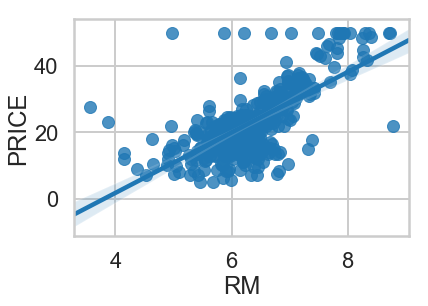

In [15]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

### Histograms
***


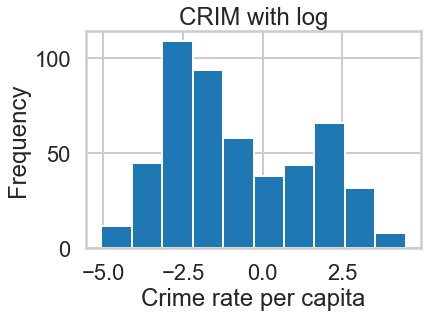

In [16]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM with log")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequency")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

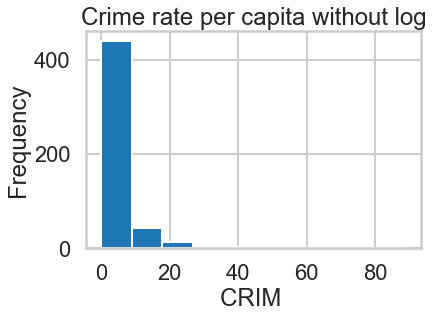

In [17]:
#your turn
#your turn
plt.hist(bos.CRIM)
plt.title("Crime rate per capita without log")
plt.xlabel("CRIM ")
plt.ylabel("Frequency")
plt.show()


**1)What was the purpose of taking the log?**

*Taking logs for plotting histogram in cases as above in which one or a few points are much larger than the bulk of the data helps in transforming the data to a new scale.*

**2) What do we gain by making this transformation?**

*Log scales allow a large range to be displayed without small values being compressed down into bottom of the graph, which makes it easier to visualize data points with different magnitudes*

**3) What do you now notice about this variable that is not obvious without making the transformation?**

*The transformed data spreads the data that was compressed at the bottom of the unmodified histogram. The crime rare per capita with log reveals that the crime rate per capita is bimodal.*


**Exercise: Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.**

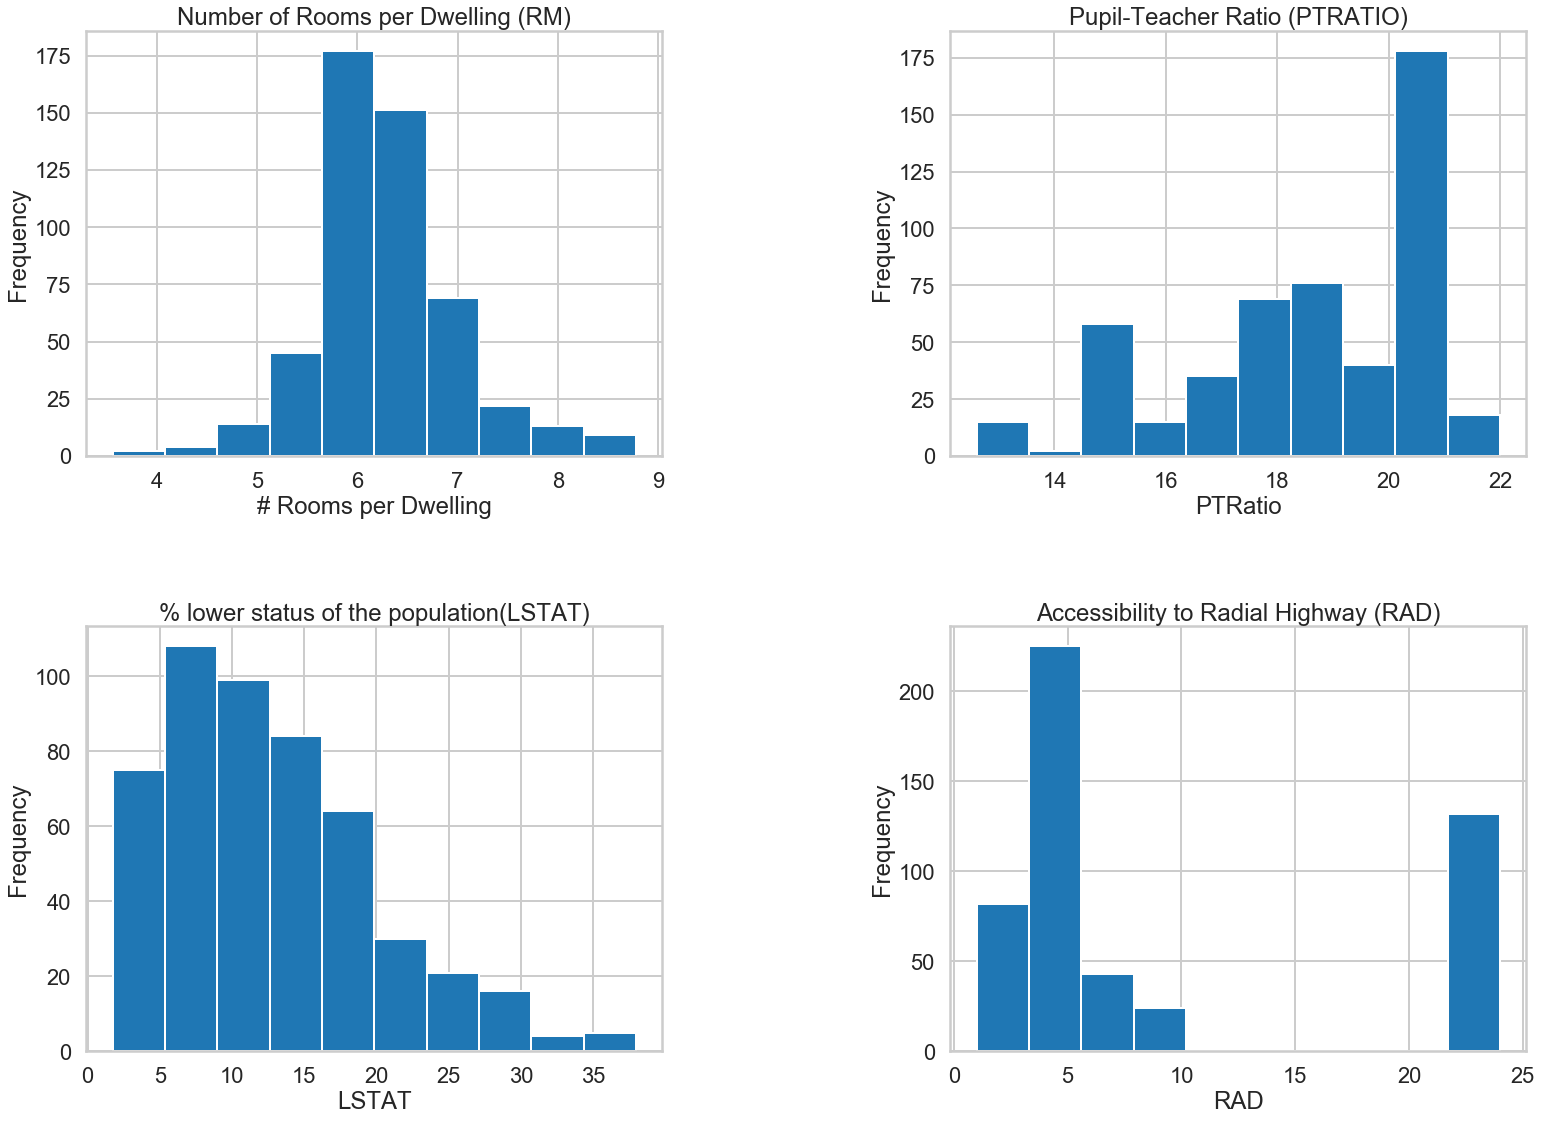

In [18]:
fig, (ax1, ax2,ax3,ax4) = plt.subplots(4,sharex=True, sharey=True,figsize=(25,21))
 
plt.subplot(221)
plt.hist(bos.RM)
plt.title('Number of Rooms per Dwelling (RM)')
plt.xlabel('# Rooms per Dwelling')
plt.ylabel('Frequency')

plt.subplot(222)
plt.hist(bos.PTRATIO)
plt.title('Pupil-Teacher Ratio (PTRATIO)')
plt.xlabel("PTRatio")
plt.ylabel('Frequency')

plt.subplot(223)
plt.hist(bos.LSTAT)
plt.title("% lower status of the population(LSTAT)")
plt.xlabel("LSTAT")
plt.ylabel('Frequency')

plt.subplot(224)
plt.hist(bos.RAD)
plt.title('Accessibility to Radial Highway (RAD)')
plt.xlabel("RAD")
plt.ylabel('Frequency')

plt.subplots_adjust(left=0.1, wspace=0.5, hspace=0.4, top=0.8)
plt.show();

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [19]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [20]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 13 Aug 2019   Prob (F-statistic):           2.49e-74
Time:                        15:45:48   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

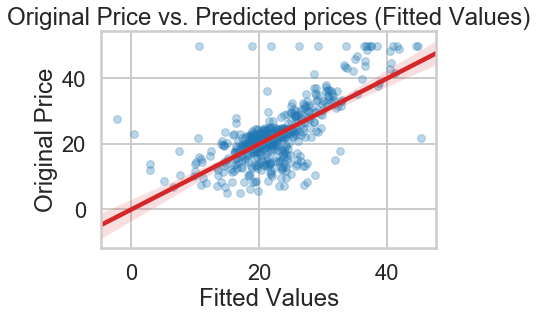

In [21]:
#  scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices.
sns.regplot(m.fittedvalues,bos.PRICE,fit_reg = True, scatter_kws={'color': 'C0', 'alpha':0.3, 's':60}, line_kws={'color': 'C3'})
plt.title('Original Price vs. Predicted prices (Fitted Values)')
plt.xlabel('Fitted Values')
plt.ylabel('Original Price');

*Eventhough the fitted values are closely aligned with the original price,a perfect linearity would be acheived when most of the data points in a scatterplot would lie on the 45 degree line such that every predicted price would be equal to the actual price. As seen in the plot above, the most of the data which lie around the original price of ~10 to 28 fall on the predicted pricing axis with outliers, and around original price of ~30 and greater, it is distributed above the 45 degree line.*

### Fitting Linear Regression using `sklearn`


In [22]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [23]:
# Look inside lm object
# lm.<tab>

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [24]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


**Solution:**

_We can change the model to not fit an intercept term by adjusting the parameter "fit-intercept" to False as below:_

_LinearRegression(fit_intercept=False).fit(X,bos.PRICE)._

*I would recommend having an intercept because when the fit intercept is set to false, the estimator deliberately sets the intercept to zero and this in turn affects the other regressors. When fit_intercept=True, the line of best fit is allowed to "fit" the y-axis. When fit_intercept=False, the intercept is forced to the origin (0, 0).*

*Including an intercept gives the model more flexibility and noise in the model*

*I would not recommend building a model without an intercept since not having an intercept forces the predicted price to be zero when all the feature variables are zeros. It is not possible to have houses with similar features with a housing price of zero dollars.*

**Exercise: One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.**

**Solution:** 

*For the residuals to be i.i.d, the residuals (really the errors) should meet the following assumptions:*

1)They are independent

2)They have constant variance

3)They are normally distributed

4)The error random variable should have zero mean $ E[\epsilon] =0 $ ,and be uncorrelated with the data variables  $ E[X^T\epsilon] =0 $


*IID refers to the first two criteria. Normally distributed residuals need not necessarily be independent or have constant variance. Situations where independence could be violated include repeated measures and time series because two or more residuals come from the same subject and hence may be correlated. Another violation of independence comes from nested designs where subjects are clustered (such as in the same school, same family, same neighborhood).Independence and homoscedasticity are more important assumptions than normality.*

**Exercise: True or false. To use linear regression,  𝑌  must be normally distributed. Explain your answer.**

**Solution:** 

*Normality of the errors  not a necessary condition.
One practically important finding according to Jeffrey Wooldridge's book, Introductory Econometrics is that even without the normality assumption, t and F statistics have approximately t and F distributions, at least in large sample sizes."  In order to make inferences about the regression parameters, it is adequate to know that the regression coefficient estimates are consistent and asymptotically normal. Confidence intervals for parameter estimates can be obtained using normality, even if the response is not normally distributed, as long as the sample size is large enough.* 




### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [25]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.45948838509015


In [26]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [27]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [28]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

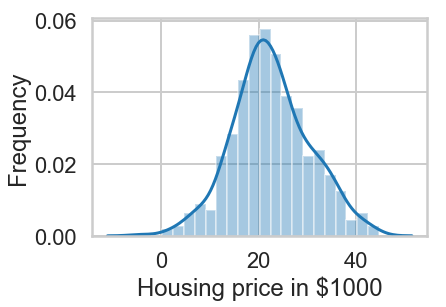

In [29]:
bos['PRED_PRICE'] = lm.predict(X)
k = len(bos['PRICE'])
bin = np.sqrt(k)
sns.distplot(bos['PRED_PRICE'],  bins = int(bin))
plt.xlabel("Housing price in $1000")
plt.ylabel("Frequency")
plt.show()



*We can see from the plot that, the values of predicted price seems to be  distributed normally. It peaks approximately around $20,000.*

**Exercise: Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).**

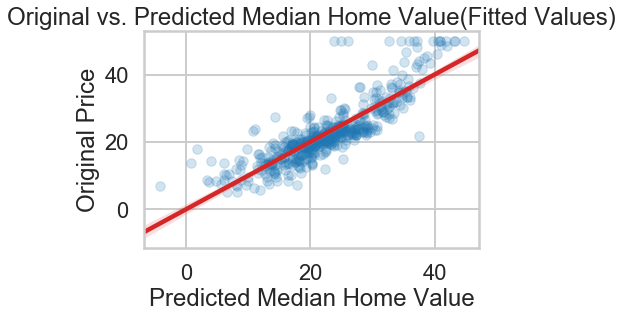

In [30]:
sns.regplot(x='PRED_PRICE', y='PRICE', data=bos, fit_reg = True,
            scatter_kws={'color': 'C0', 'alpha':0.2, 's':90}, 
            line_kws={'color': 'C3'})

_ = plt.xlabel('Predicted Median Home Value')
_ = plt.ylabel('Original Price')
_ = plt.title('Original vs. Predicted Median Home Value(Fitted Values)');

*It suggests a strong linear relationship with few outliers. It is safe to assume that the original and predicted median home values align with each other*

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [31]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11078.784577954977


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [33]:
print(np.sum((lm.predict(X) - np.mean(bos.PRICE)) ** 2))

31637.510837065056


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{RSS}{N-K-1}$$

$$MSR = \frac{ESS}{K}$$

**Remember:** Notation may vary across resources particularly the use of $R$ and $E$ in $RSS/ESS$ and $MSR/MSE$. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

In [35]:
# interpret the intercept
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()

lm.fit(X[['PTRATIO']], bos.PRICE)
print('Estimated intercept coefficient: {}'.format(lm.intercept_))


Estimated intercept coefficient: 62.34462747483265


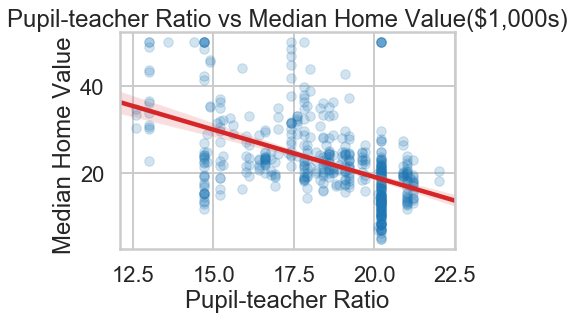

In [36]:
#plotting the fitted linear regression line
sns.regplot(x='PTRATIO', y='PRICE', data=bos, fit_reg = True,
            scatter_kws={'color': 'C0', 'alpha':0.2, 's':90}, 
            line_kws={'color': 'C3'})

_ = plt.xlabel('Pupil-teacher Ratio')
_ = plt.ylabel('Median Home Value ')
_ = plt.title('Pupil-teacher Ratio vs Median Home Value($1,000s)');

**Exercise: Calculate (or extract) the   $R^2$   value. What does it tell you?**

In [37]:
#calculate R-squared value
print('R-squared value: {}'.format(lm.score(X[['PTRATIO']], bos.PRICE)))

R-squared value: 0.257847318009223



*R-squared = Explained variation / Total variation*

*R-squared is always between 0 and 100%:*

*0% indicates that the model explains none of the variability of the response data around its mean.*
*100% indicates that the model explains all the variability of the response data around its mean.*
*The $R^2$ value of 0.258 indicates that just over 25% of the variability in median home value is explained by the variability in the pupil-teacher ratio.*

<b>Exercise: Compute the $F$-statistic. What does it tell you?</b>

In [39]:
m_2 = ols('PRICE ~ PTRATIO', bos).fit()
#print(m_2.summary())

print('\n\nR^2: {}'.format(m_2.rsquared))
print('F-statistic: {}'.format(m_2.fvalue))



R^2: 0.257847318009223
F-statistic: 175.1055428756955


*F-test sums the predictive power of all independent variables. In its most general sense, the F-test takes a ratio of two variances and tests whether the ratio equals 1. A ratio of 1 indicates that the two sets of variances are equal. A ratio greater than one suggests that the numerator is greater than the denominator. If the F-statistic takes on a value close to 1, it indicates that the null hypothesis is true and that there is no relationship between the predictors and the response. If the F-statistic is greater than 1, it indicates that Alternate Hypothesis is true, and that there is a relationship between the predictors and the response.*

*The value of Prob(F) is the probability that the null hypothesis for the full model is true (i.e., that all of the regression coefficients are zero).  For example, here  Prob(F) has a value of $1.61e^-34$ implies that there is less than 1 chance in 100 that all of the regression parameters are zero.  This low a value would imply that at least some of the regression parameters are nonzero and that the regression equation does have some validity in fitting the data* 

*Here, our F-statistic of 175 is much greater than 1, and indicates that there is a relationship between the pupil-teacher ratio and the median home value.*

<b>Exercise: Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</b>

*It can be seen that 𝐹 -statistic value is equal to the square of   𝑡 -statistic for the regression coefficient*

*value 𝐹 -statistic* = *value of 𝑡 -statistic* $^2$

*value 𝐹 -statistic =  (-13.233).(-13.233) = 175.1*

*value of 𝑡 -statistic = -13.233*

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [44]:
#Fit a linear regression model using three independent variables(CRIM, RM, PTRATIO)
m1 = ols('PRICE ~ CRIM + RM + PTRATIO', bos).fit()
print(m1.summary())


print('\nF-statistic: {}'.format(m1.fvalue))
print('R-squared: {}'.format(m1.rsquared))

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Tue, 13 Aug 2019   Prob (F-statistic):           6.15e-98
Time:                        16:11:24   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034     -0.836      0.4

In [45]:
print(f'The F-statistic ({m1.fvalue}) is much greater than 1, indicating that there is a relationship between at least one of the predictors and the response.  The R-squared value of {m1.rsquared} indicates that these three factors together account for 59% of the variability. The R-squared value for the PTRATIO alone was just over 0.25, so this represents a 34% improvement in determining the variables that affect the variability of the median home value.*')



The F-statistic (245.1644903006464) is much greater than 1, indicating that there is a relationship between at least one of the predictors and the response.  The R-squared value of 0.5943412940723473 indicates that these three factors together account for 59% of the variability. The R-squared value for the PTRATIO alone was just over 0.25, so this represents a 34% improvement in determining the variables that affect the variability of the median home value.*


**Exercise:Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.**

*The p-values of all three features are 0, indicating that all three are statistically-significant. RM has a strongest postive correlation, and it indicates that for each additional unit of RM, the median home value increases by $7,3804. PTRATIO has the next highest correlation and it is negative. For each additional pupil per teacher, the median home value decreases by 1,0695 dollars. CRIM also has a negative correlation, and for each unit of increase in CRIM, the median house value would decrease by 205 dollars*

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [46]:
# fit the model adding two new predictors (m2) - AGE + LSTAT

m2 = ols('PRICE ~ CRIM + RM + PTRATIO + AGE + LSTAT', bos).fit()

print('\nF-statistic of reduced model with CRIM + RM + PTRATIO predictors: {}'.format(m1.fvalue))
print('R-squared of reduced model with CRIM + RM + PTRATIO predictors: {}'.format(m1.rsquared))
print('AIC of reduced model with CRIM + RM + PTRATIO predictors: {}'.format(m1.aic))

print('\nF-statistic of full model with CRIM + RM + PTRATIO+ AGE+ LSTAT predictors: {}'.format(m2.fvalue))
print('R-squared of full model with CRIM + RM + PTRATIO+ AGE+ LSTAT predictors: {}'.format(m2.rsquared))
print('AIC  of full model with CRIM + RM + PTRATIO + AGE+ LSTAT  predictors: {}'.format(m2.aic))



F-statistic of reduced model with CRIM + RM + PTRATIO predictors: 245.1644903006464
R-squared of reduced model with CRIM + RM + PTRATIO predictors: 0.5943412940723473
AIC of reduced model with CRIM + RM + PTRATIO predictors: 3231.9451235449956

F-statistic of full model with CRIM + RM + PTRATIO+ AGE+ LSTAT predictors: 215.87749749672858
R-squared of full model with CRIM + RM + PTRATIO+ AGE+ LSTAT predictors: 0.6834215770592027
AIC  of full model with CRIM + RM + PTRATIO + AGE+ LSTAT  predictors: 3110.486882625002


*Adding AGE and LSTAT to the regression equation results in a more accurate model: R-squared increases by 10% and AIC decreases by 121 points*


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

**Exercise: Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?**


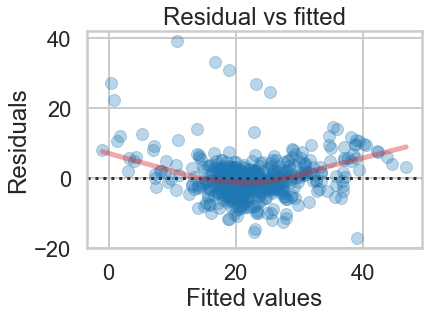

In [47]:
'''Residuals could show how poorly a model represents data. Residuals could reveal unexplained patterns in the data of the fitted model.This 
plot can be easily plotted using seaborn residplot with fitted values as x parameter, and the dependent variable as y. lowess=True makes sure
the lowess regression line is drawn. Additional parameters are passed to underlying matplotlib scatter and line functions using scatter_kws and
line_kws, also titles and labels are set using matplotlib methods. The ; in the end gets rid of the output text <matplotlib.text.Text at
0x000000000> at the top of the plot '''

sns.residplot(m1.fittedvalues, 'PRICE', 
              data=bos, 
              lowess=True, 
              scatter_kws={'color': 'C0', 'alpha': 0.3},
              line_kws={'color': 'C3','lw': 5, 'alpha': 0.4});
plt.title("Residual vs fitted")
plt.xlabel('Fitted values')
plt.ylabel('Residuals');

*An ideal Residuals vs Fitted plot will look like random noise; there won’t be any apparent patterns in the scatterplot and the red line would be horizontal.*
​
*The bow-shaped line in red is an indicator that we are failing to capture some of the non-linear features of the model. In other words, we are underfitting the model.*

**Exercise: Construct a quantile plot of the residuals. What does the plot tell you?**

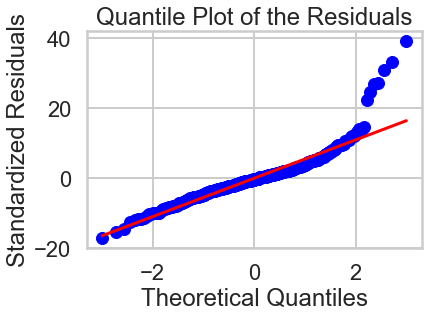

In [48]:
'''This plot shows if the residuals are normally distributed. This plots the standardized (z-score) residuals against the theoretical normal quantiles. 
A good normal QQ plot has all of the residuals lying on or close to the red line.'''

import pylab
# quantile plot of residuals
stats.probplot(m1.resid, plot=pylab)
_ = plt.title('Quantile Plot of the Residuals')
_ = plt.xlabel('Theoretical Quantiles')
_ = plt.ylabel('Standardized Residuals');

*Looking at the graph above, there are several points that fall on the red line. This is indicative of the errors being normally distributed. The points near the right tail that do not fall on the red line are the outliers*

**Exercise: What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?**

*Fitted vs.residual plot is a scatter plot of residuals on the y axis and fitted values (estimated responses) on the x axis. The plot is used to detect non-linearity, unequal error variances, and outliers.*

*The quantile-quantile plot (Q-Q plot) is an effective graphical tool for analyzing distribution functions. A QQ plot can be used to compare samples to each other or one sample with a theoretical distribution (e.g. normal).  Moreover, any outliers in the data are easily identified in the QQ plot.*

*The advantages of the Quantile-Quantile plot are:*

*1)The sample sizes do not need to be equal.*

*2)QQ plots are easier to use to judge skewness or more accurately assess whether the distribution tails are thicker or thinner than a normal distribution.*

*3)Many distributional aspects can be simultaneously tested. For example, shifts in location, shifts in scale, changes in symmetry, and the   presence of outliers can all be detected from this plot.*

*Q-Q plots are preferable for graphical estimation of distribution parameters, whereas probability plots are preferable for graphical estimation of percentiles.*

*The Residuals _versus_ Fitted plot is useful to illustrate if a linear model presents:*

*1)non-linear relationship between the response variable and predictors:  A horizontal trend line in the plot indicates absence of nonlinear patterns between response and predictors, which is what is expected in a linear model.*

*2)heteroscedasticity (aka heterogeneity of variance): A model will exhibit heteroscedasticity when the residuals are not equally spread along the fitted values.*

*An outlier in one model may not be an outlier in another when the variables have been changed or transformed.*

**Exercise: Identify any outliers (if any) in your model and write a story describing what these outliers might represent.**

In [50]:
# identify  large residuals
print("An outlier is a data point that diverges from an overall pattern in a sample. An outlier has a large residual (the distance between the predicted value () and the observed value (y)). ")
# add new columns
bos['FITTED'] = m1.fittedvalues
bos['RESIDUALS'] = m1.resid

print("Based on the observations from the QQ plot,the residuals over 20 seems to be the outliers")

large_residuals = bos[bos.RESIDUALS > 20]
print(f"The length of  large residuals: {len(large_residuals)}")

#identify outlier based on large residuals
ors = m1.outlier_test(order=True)
lro = ors.nlargest(len(large_residuals), 'student_resid')
outliers = list(lro.index)
print(f"Outliers: {outliers}")

print(large_residuals)


An outlier is a data point that diverges from an overall pattern in a sample. An outlier has a large residual (the distance between the predicted value () and the observed value (y)). 
Based on the observations from the QQ plot,the residuals over 20 seems to be the outliers
The length of  large residuals: 7
Outliers: [368, 372, 371, 365, 369, 370, 367]
         CRIM   ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
365   4.55587  0.0   18.1   0.0  0.718  3.561   87.9  1.6132  24.0  666.0   
367  13.52220  0.0   18.1   0.0  0.631  3.863  100.0  1.5106  24.0  666.0   
368   4.89822  0.0   18.1   0.0  0.631  4.970  100.0  1.3325  24.0  666.0   
369   5.66998  0.0   18.1   1.0  0.631  6.683   96.8  1.3567  24.0  666.0   
370   6.53876  0.0   18.1   1.0  0.631  7.016   97.5  1.2024  24.0  666.0   
371   9.23230  0.0   18.1   0.0  0.631  6.216  100.0  1.1691  24.0  666.0   
372   8.26725  0.0   18.1   1.0  0.668  5.875   89.6  1.1296  24.0  666.0   

     PTRATIO       B  LSTAT 

The Residuals vs. Leverage plots helps you identify influential data points on your model. Not all outliers are influential in linear regression analysis.

Unlike the other plots, this patterns in this plot are not relevant. We watch out for outlying values at the upper right corner or at the lower right corner. Those spots are the places where cases can be influential against a regression line.

**Leverage:** Leverage is a measure of how far an observation on the predictor variable is from the mean of the predictor variable. The higher the leverage value of an observation, the more potential it has to impact the fitted model.


**Influence:** An observation is said to be influential if removing the observation substantially changes the estimate of the coefficients. An observation is influential if the estimates change substantially when the point is omitted. Cook’s Distance is a pretty good measure of influence of an observation.

Cook's D statistic, measures the sum of squared deviations between the observed values and the hypothetical values we would get if we deleted that data point. When cases are outside of the Cook’s distance (meaning they have high Cook’s distance scores), the cases are influential to the regression results. The regression results will be altered if we exclude those cases.


**Exercise: Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.**

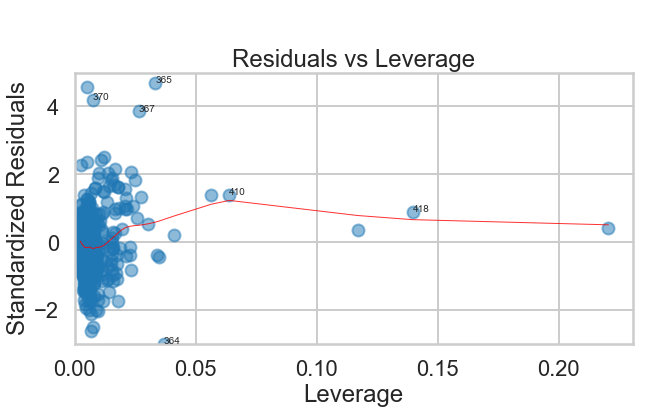

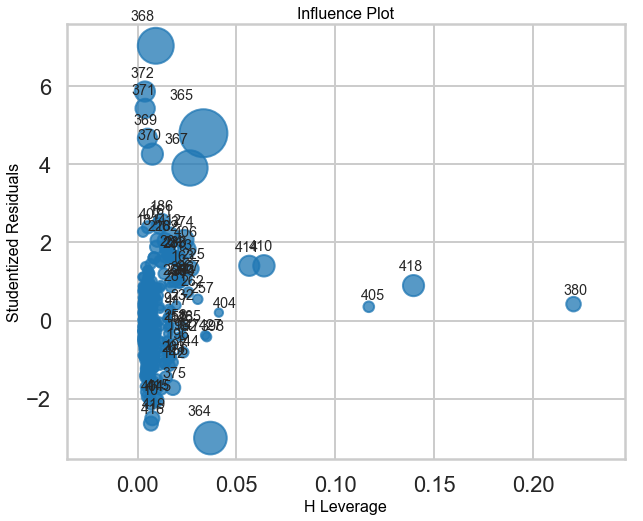

In [56]:
#Residual vs Leverage plot
m1_y = m1.fittedvalues
# model residuals
model_residuals = m1.resid
# normalized residuals
model_norm_residuals = m1.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# leverage, from statsmodels internals
model_leverage = m1.get_influence().hat_matrix_diag
model_cooks = m1.get_influence().cooks_distance[0]
plot_lm_4 = plt.figure(figsize=(10, 5)); 
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);
sns.regplot(model_leverage, model_norm_residuals,scatter=False,ci=False,lowess=True,line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals');

# annotations
leverage_top_7 = list(np.flip(np.argsort(model_cooks), 0)[:7])
for i in leverage_top_7:plot_lm_4.axes[0].annotate(i, xy=(model_leverage[i],model_norm_residuals[i]));

#Plotting Influence plot
fig, ax = plt.subplots(figsize=(10, 8))
fig = sm.graphics.influence_plot(m1, ax=ax, criterion="cooks")


*Based on the Influence plot as shown aboave, the data points 365,368,364 have low leverage but a large residual. 380,405 datapoints has small residual and large leverage. 418 has both high leverage and pretty high residuals, and, therefore, large influence.*

*Leverage points that have a Cook's distance greater than 0.5 are 365 and 367. Removing the points on the far right of the plot might improve the model. We may want to remove points with a Cook’s distance of less than 0.5 also, especially if there are only a few observations compared to the rest of the data. If these points are removed, we would re-run this analysis again and determine how much the model improved.*

**Exercise: Remove the outliers and high leverage points from your model and run the regression again. How do the results change?**

In [57]:
#initiate the variable rem by combining two lists
rem = set(outliers  + leverage_top_7)
rem = list(rem)

bos2 = bos.drop(bos.index[rem])

# Remove the outliers and high leverage points from your model and run the regression again. 

m3 = ols('PRICE ~ CRIM + RM + PTRATIO', bos2).fit()
#print(m3.summary())
print('\nF-statistic of reduced model with CRIM + RM + PTRATIO predictors after removing the outliers and high leverage points: {}'.format(m3.fvalue))
print('R-squared of reduced model with CRIM + RM + PTRATIO predictors after removing the outliers and high leverage points: {}'.format(m3.rsquared))
print('AIC of reduced model with CRIM + RM + PTRATIO predictors after removing the outliers and high leverage points: {}'.format(m3.aic))

print('\nF-statistic of full model with CRIM + RM + PTRATIO predictors: {}'.format(m1.fvalue))
print('R-squared of full model with CRIM + RM + PTRATIO predictors: {}'.format(m1.rsquared))
print('AIC  of full model with CRIM + RM + PTRATIO  predictors: {}'.format(m1.aic))


F-statistic of reduced model with CRIM + RM + PTRATIO predictors after removing the outliers and high leverage points: 442.35477221461485
R-squared of reduced model with CRIM + RM + PTRATIO predictors after removing the outliers and high leverage points: 0.7295312785268995
AIC of reduced model with CRIM + RM + PTRATIO predictors after removing the outliers and high leverage points: 2927.378970194938

F-statistic of full model with CRIM + RM + PTRATIO predictors: 245.1644903006464
R-squared of full model with CRIM + RM + PTRATIO predictors: 0.5943412940723473
AIC  of full model with CRIM + RM + PTRATIO  predictors: 3231.9451235449956


In [58]:
print(f"F-statistic of reduced model  after removing the outliers and high leverage points increased by {m3.fvalue-m1.fvalue} points ")
print(f"R-squared of reduced model after removing the outliers and high leverage points increased by {m3.rsquared-m1.rsquared} points")
print(f"AIC of reduced model dropped by {m1.aic-m3.aic} points")

F-statistic of reduced model  after removing the outliers and high leverage points increased by 197.19028191396845 points 
R-squared of reduced model after removing the outliers and high leverage points increased by 0.13518998445455221 points
AIC of reduced model dropped by 304.56615335005745 points
